In [28]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt


## Data import

In [130]:
df = pd.read_csv('CN_DB.csv')
print(df.columns)

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'heating_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out_min', 't_out_monthly', 'latitude',
       'HDD'],
      dtype='object')


In [131]:
df_city = pd.read_csv('CN_DB_CITY.csv')
df_city

,city,records,thermal_sensation,ta,top,rh,vel,met,clo,latitude,t_out_min,HDD,tsr,p_dh,p_nv
0,HainanSanya,5,0.60,24.88,24.88,70.20,0.00,0.98,0.33,18.25,21.0,7.1,0.80,0.00,1.00
1,GuangdongGuangzhou,997,-0.01,23.85,23.88,52.94,0.10,1.00,0.86,23.13,13.7,325.1,0.90,0.00,0.00
2,YunnanKunming,415,-1.15,13.62,13.62,16.95,0.28,1.08,0.65,24.87,9.2,1242.3,0.66,0.00,1.00
3,FujianFuzhou,7,-0.71,18.10,18.10,67.43,0.00,0.89,0.35,26.08,11.3,655.5,0.86,0.00,1.00
4,FujianZhenjiang,2,-0.50,22.90,22.90,74.50,0.00,0.90,0.31,26.10,10.0,835.5,0.50,0.00,1.00
5,FujianNanping,4,0.00,17.90,17.90,60.25,0.00,0.88,0.42,26.64,10.1,757.8,1.00,0.00,1.00
6,HunanHengyang,1,-1.00,16.90,16.90,66.00,0.00,0.90,0.66,26.89,6.3,2316.8,1.00,0.00,1.00
7,HunanChangsha,1108,-0.40,17.22,17.41,48.35,0.03,1.02,0.95,28.23,5.2,1319.0,0.89,0.00,0.58
8,SichuanZigong,23,-0.22,11.03,11.03,66.52,0.00,1.00,1.59,29.34,7.6,1087.9,0.78,0.00,1.00
9,Lhasa,355,-1.10,10.64,10.64,71.19,0.02,1.10,1.25,29.65,-0.2,2861.5,0.64,0.01,0.68


Calcualte the distance of each city to Huai River (33˚N)

In [132]:
df_city['distance'] = df_city['latitude'] - 33
# multiple the distance by 111 to reflecct the distance in km
df_city['distance'] = df_city['distance'] * 111

## Sharp threshold assumption
All cities have disctrict heating systems if the distance is >= 0</br>
No city has disctrict heating systems if the distance is < 0

In [133]:
# create a new dummy variable based on the distance
df_rd = df_city.assign(threshold=(df_city["distance"] > 0).astype(int))

## Causal effect of district heating on temperature
Difference between the treatment and control group near the Huai river, which can be viewed as the nature experiment outcome

### Linear model

In [134]:
model = smf.wls("top~distance*threshold", df_rd, weights=df_rd["records"]).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.8379,1.434,11.742,0.000,13.905,19.771
distance,-0.0035,0.002,-1.443,0.160,-0.009,0.001
threshold,4.4055,1.924,2.289,0.030,0.470,8.341
distance:threshold,0.0045,0.003,1.619,0.116,-0.001,0.010


The coef of the "threshold" is the causal effect, and coef of "Intercept" is the basedline

### Quadratic model

In [135]:
df_rd['distance2'] = df_rd['distance'] ** 2
# try polynomial
model = smf.wls("top ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    17.2713
Effect is:     4.2526
pvalue is:  0.006


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.2713,1.067,16.187,0.000,15.089,19.453
distance2,3.573e-06,1.92e-06,1.865,0.072,-3.44e-07,7.49e-06
threshold,4.2526,1.441,2.951,0.006,1.305,7.200
distance2:threshold,-3.002e-06,2.07e-06,-1.452,0.157,-7.23e-06,1.23e-06


In [136]:
# a function to extract the city name from the full string
def get_city_name(full_string):
    # Iterate over the string in reverse to find the last capital letter
    for i in range(len(full_string) - 1, -1, -1):
        if full_string[i].isupper():
            # Return the substring from the last capital letter to the end
            return full_string[i:]
    return ""

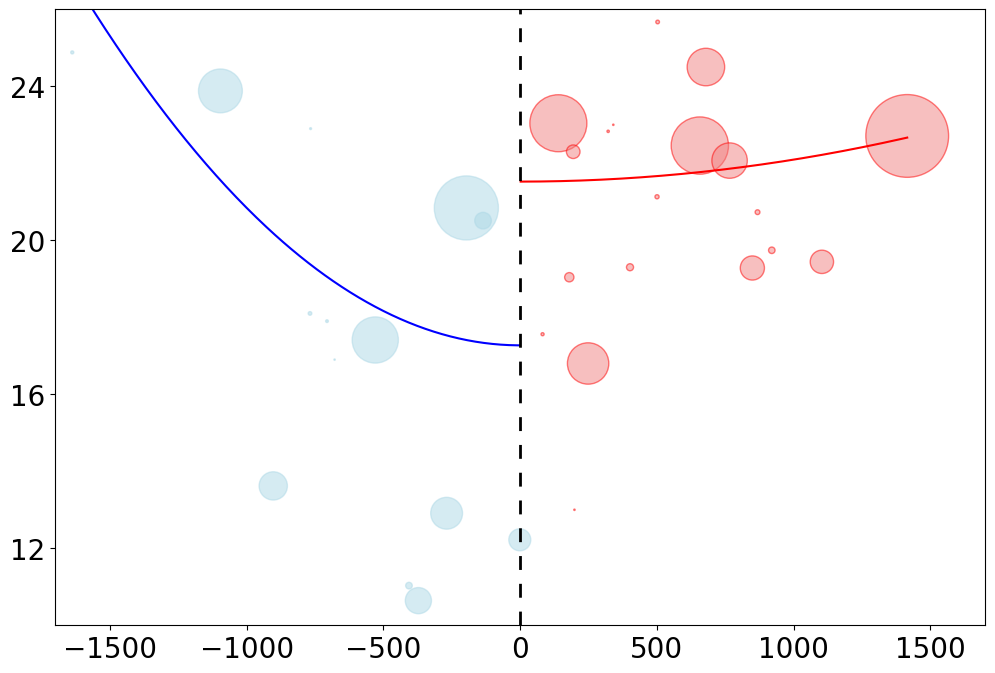

In [137]:
plt.figure(figsize=(12, 8))
# Split the data into two parts
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]
# Scatter plot for points below the threshold
plt.scatter(df_below['distance'], df_below['top'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['distance'], df_above['top'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of distance values
distance_grid = np.linspace(df_rd['distance'].min(), df_rd['distance'].max(), 500)

# Compute threshold values for each point
threshold_grid = (distance_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'distance': distance_grid, 'distance2': distance_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['distance'] < 0]
grid_above = grid_df[grid_df['distance'] >= 0]
pred_below = predictions[grid_df['distance'] < 0]
pred_above = predictions[grid_df['distance'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['distance'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['distance'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# # plot city names on the graph
# for i in range(len(df_rd)):
#     plt.text(df_rd['distance'][i], df_rd['top'][i], get_city_name(df_rd['city'][i]), fontsize=12)
#     # plot the p_dh value next to the city name
#     plt.text(df_rd['distance'][i], df_rd['top'][i]-0.5, df_rd['p_dh'][i], fontsize=12)

# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.yticks(np.arange(12, 28, 4), fontsize=20)
plt.ylim(10, 26)
plt.xlim(-1700, 1700)

# Save as SVG
plt.savefig('fig4a.svg', format='svg')
plt.show()

## Causal effect on thermal sensation vote

### Linear model

In [138]:
model = smf.wls("thermal_sensation~distance*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    -0.3995
Effect is:     0.6311
pvalue is:  0.016


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.3995,0.184,-2.174,0.038,-0.775,-0.024
distance,-2.88e-05,0.000,-0.092,0.928,-0.001,0.001
threshold,0.6311,0.247,2.559,0.016,0.127,1.136
distance:threshold,3.221e-05,0.000,0.090,0.929,-0.001,0.001


### Quadratic model

In [139]:
model = smf.wls("thermal_sensation ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    -0.4307
Effect is:     0.6437
pvalue is:  0.002


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.4307,0.139,-3.099,0.004,-0.715,-0.147
distance2,1.306e-07,2.49e-07,0.524,0.605,-3.8e-07,6.41e-07
threshold,0.6437,0.188,3.429,0.002,0.260,1.028
distance2:threshold,-1.075e-07,2.69e-07,-0.399,0.693,-6.58e-07,4.43e-07


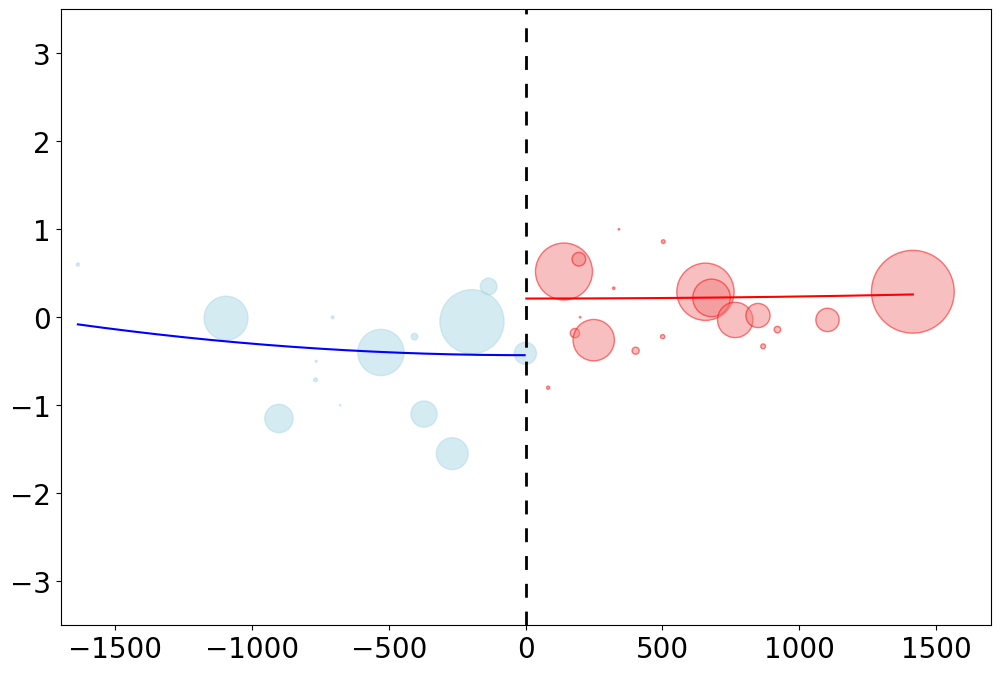

In [140]:
plt.figure(figsize=(12, 8))

# Split the data into two parts
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]

# Scatter plot for points below the threshold
plt.scatter(df_below['distance'], df_below['thermal_sensation'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['distance'], df_above['thermal_sensation'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of distance values
distance_grid = np.linspace(df_rd['distance'].min(), df_rd['distance'].max(), 500)

# Compute threshold values for each point
threshold_grid = (distance_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'distance': distance_grid, 'distance2': distance_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['distance'] < 0]
grid_above = grid_df[grid_df['distance'] >= 0]
pred_below = predictions[grid_df['distance'] < 0]
pred_above = predictions[grid_df['distance'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['distance'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['distance'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-1700, 1700)
plt.ylim(-3.5, 3.5)

plt.savefig('fig4b.svg', format='svg')
plt.show()


## PMV

In [141]:
df_rd.head()

,city,records,thermal_sensation,ta,top,rh,vel,met,clo,latitude,t_out_min,HDD,tsr,p_dh,p_nv,distance,threshold,distance2
0,HainanSanya,5,0.60,24.88,24.88,70.20,0.00,0.98,0.33,18.25,21.0,7.1,0.80,0.0,1.0,-1637.25,0,2.680588e+06
1,GuangdongGuangzhou,997,-0.01,23.85,23.88,52.94,0.10,1.00,0.86,23.13,13.7,325.1,0.90,0.0,0.0,-1095.57,0,1.200274e+06
2,YunnanKunming,415,-1.15,13.62,13.62,16.95,0.28,1.08,0.65,24.87,9.2,1242.3,0.66,0.0,1.0,-902.43,0,8.143799e+05
3,FujianFuzhou,7,-0.71,18.10,18.10,67.43,0.00,0.89,0.35,26.08,11.3,655.5,0.86,0.0,1.0,-768.12,0,5.900083e+05
4,FujianZhenjiang,2,-0.50,22.90,22.90,74.50,0.00,0.90,0.31,26.10,10.0,835.5,0.50,0.0,1.0,-765.90,0,5.866028e+05


### relative humidity

In [142]:
model = smf.wls("rh ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    52.5450
Effect is:   -20.4027
pvalue is:  0.000


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,52.5450,3.316,15.847,0.000,45.763,59.327
distance2,-6.356e-06,5.95e-06,-1.068,0.294,-1.85e-05,5.82e-06
threshold,-20.4027,4.479,-4.555,0.000,-29.563,-11.242
distance2:threshold,6.756e-06,6.42e-06,1.052,0.302,-6.38e-06,1.99e-05


### air speed

In [143]:
model = smf.wls("vel ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:     0.0309
Effect is:    -0.0072
pvalue is:  0.704


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0309,0.014,2.223,0.034,0.002,0.059
distance2,9.04e-08,2.49e-08,3.625,0.001,3.94e-08,1.41e-07
threshold,-0.0072,0.019,-0.383,0.704,-0.046,0.031
distance2:threshold,-8.275e-08,2.69e-08,-3.075,0.005,-1.38e-07,-2.77e-08


### metabolic rate

In [144]:
model = smf.wls("met ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:     1.0778
Effect is:     0.0189
pvalue is:  0.457


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.0778,0.019,58.220,0.000,1.040,1.116
distance2,-5.985e-08,3.32e-08,-1.801,0.082,-1.28e-07,8.12e-09
threshold,0.0189,0.025,0.755,0.457,-0.032,0.070
distance2:threshold,1.711e-08,3.59e-08,0.477,0.637,-5.62e-08,9.05e-08


### clothing insulation

In [145]:
model = smf.wls("clo ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:     1.0973
Effect is:    -0.1982
pvalue is:  0.106


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.0973,0.088,12.496,0.000,0.918,1.277
distance2,-2.567e-07,1.58e-07,-1.628,0.114,-5.79e-07,6.57e-08
threshold,-0.1982,0.119,-1.671,0.106,-0.441,0.044
distance2:threshold,2.731e-07,1.7e-07,1.605,0.119,-7.49e-08,6.21e-07


# Correlational analysis

In [146]:
# Split the data into two parts based on the threshold
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]

## Thermal sensation vote amd Top

In [147]:
# # Fit the models for each group
# model = smf.wls("thermal_sensation~top", df_rd, weights=df_rd["records"]).fit()
# model.summary().tables[1]

# Fit the models for each group
model_below = smf.wls("thermal_sensation ~ top", weights=df_below["records"], data=df_below).fit()
model_above = smf.wls("thermal_sensation ~ top", weights=df_above["records"], data=df_above).fit()
print(model_below.summary().tables[1])
print(model_above.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3648      0.357     -6.630      0.000      -3.142      -1.588
top            0.1070      0.019      5.685      0.000       0.066       0.148
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8055      0.372     -4.854      0.000      -2.590      -1.021
top            0.0925      0.017      5.505      0.000       0.057       0.128


/Users/ruijisun/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
/Users/ruijisun/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [148]:
# calcualte R2 for the two models
# R2 = 1 - (RSS/TSS)
RSS_below = sum(model_below.resid ** 2)
TSS_below = sum((df_below['thermal_sensation'] - df_below['thermal_sensation'].mean()) ** 2)
R2_below = 1 - RSS_below/TSS_below
RSS_above = sum(model_above.resid ** 2)
TSS_above = sum((df_above['thermal_sensation'] - df_above['thermal_sensation'].mean()) ** 2)
R2_above = 1 - RSS_above/TSS_above
print("R2_below is:", R2_below)
print("R2_above is:", R2_above)

R2_below is: 0.38416462124461526
R2_above is: 0.41860988793628096


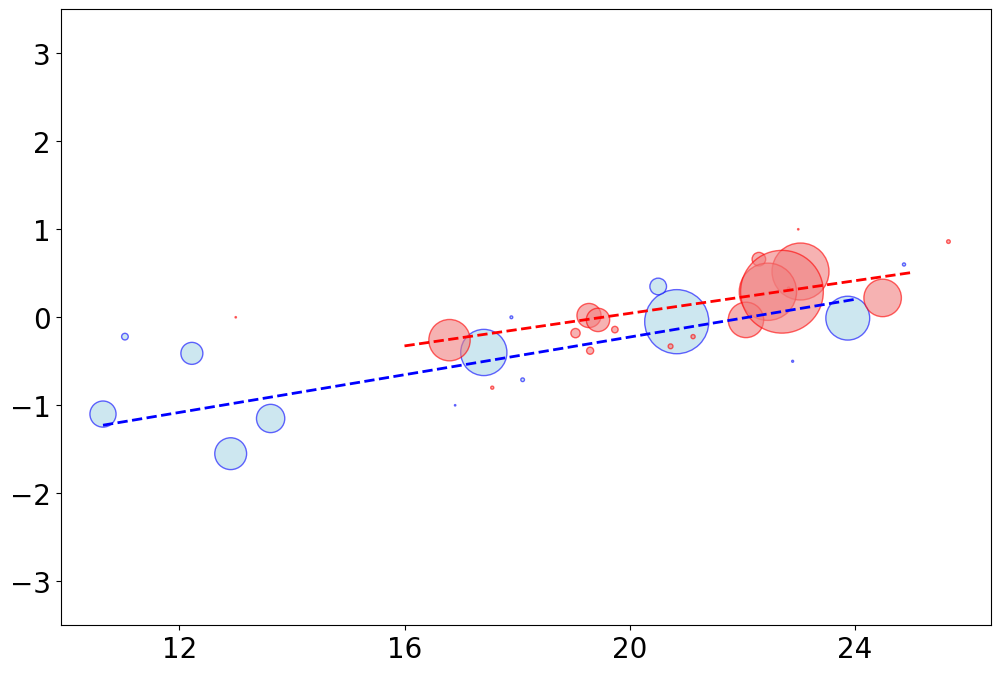

In [149]:
# Initialize figure
plt.figure(figsize=(12, 8))

# Scatter plot for points below the threshold
plt.scatter(df_below['top'], df_below['thermal_sensation'], 
            s=df_below['records'], facecolors='lightblue', edgecolors='blue', 
            alpha=0.6, label='Cool Indoor Environment')

# Scatter plot for points above the threshold
plt.scatter(df_above['top'], df_above['thermal_sensation'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.6, label='Warm Indoor Environment')

# Plot the fitted lines smoothly
top_grid_above = np.linspace(16, 25, 500)
top_grid = np.linspace(df_rd['top'].min(), 24, 500)
pred_below = model_below.predict(pd.DataFrame({'top': top_grid}))
pred_above = model_above.predict(pd.DataFrame({'top': top_grid_above}))
plt.plot(top_grid, pred_below, color='blue', linewidth=2, linestyle='--', label='Fitted (Cool Indoor Environment)')
plt.plot(top_grid_above, pred_above, color='red', linewidth=2, linestyle='--', label='Fitted (Warm Indoor Environment)')

# Adjust ticks and labels
plt.xticks(np.arange(12, 28, 4), fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-3.5, 3.5)

# Add axis labels

# Show the plot
plt.savefig('fig5a.svg', format='svg')
plt.show()

## Top, thermal satisfaction rate

In [102]:
# Split the data into two parts based on the threshold of 16 degrees
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]

# Fit the models for each group
model_below = smf.wls("tsr ~ top", weights=df_below["records"], data=df_below).fit()
model_above = smf.wls("tsr ~ top", weights=df_above["records"], data=df_above).fit()

print(model_below.summary().tables[1])
print(model_above.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3147      0.105      3.002      0.011       0.086       0.543
top            0.0278      0.006      5.016      0.000       0.016       0.040
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2954      0.152      8.507      0.000       0.974       1.617
top           -0.0204      0.007     -2.962      0.009      -0.035      -0.006


/Users/ruijisun/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
/Users/ruijisun/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


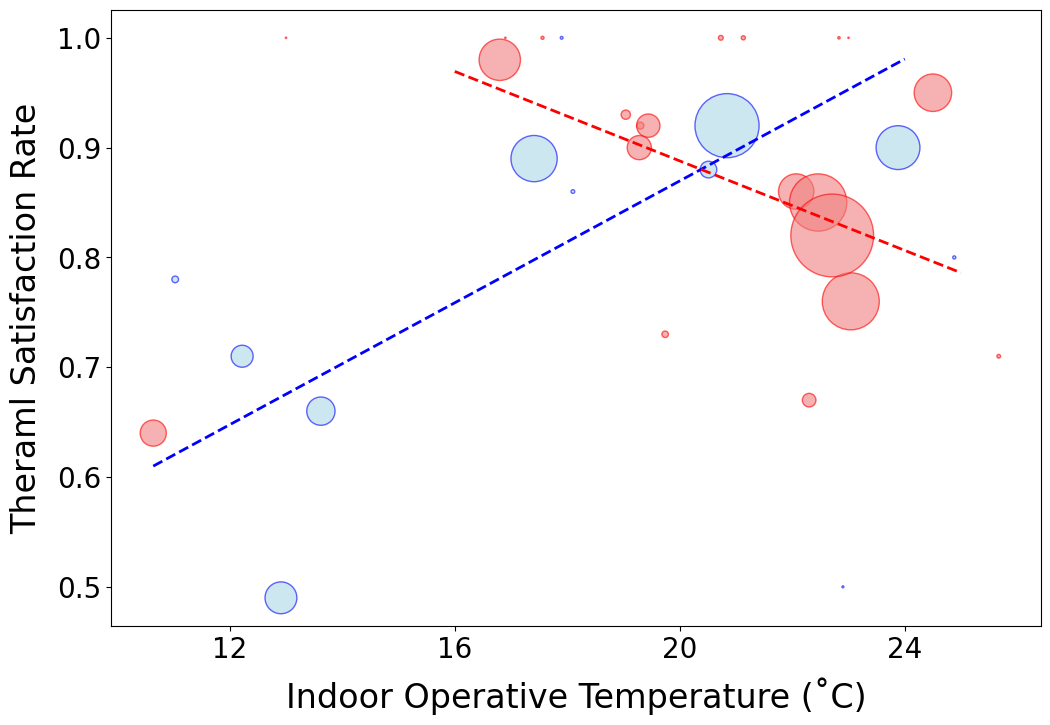

In [110]:
# Initialize figure
plt.figure(figsize=(12, 8))

# Scatter plot for points below the threshold
plt.scatter(df_below['top'], df_below['tsr'], 
            s=df_below['records'], facecolors='lightblue', edgecolors='blue', 
            alpha=0.6, label='Cool Indoor Environment')

# Scatter plot for points above the threshold
plt.scatter(df_above['top'], df_above['tsr'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.6, label='Warm Indoor Environment')

# Plot the fitted lines smoothly
top_grid_above = np.linspace(16, 25, 500)
top_grid = np.linspace(df_rd['top'].min(), 24, 500)
pred_below = model_below.predict(pd.DataFrame({'top': top_grid}))
pred_above = model_above.predict(pd.DataFrame({'top': top_grid_above}))
plt.plot(top_grid, pred_below, color='blue', linewidth=2, linestyle='--', label='Fitted (Cool Indoor Environment)')
plt.plot(top_grid_above, pred_above, color='red', linewidth=2, linestyle='--', label='Fitted (Warm Indoor Environment)')

# Adjust ticks and labels
plt.xticks(np.arange(12, 28, 4), fontsize=20)
plt.yticks(np.arange(0.5, 1.05, 0.1), fontsize=20)

# Add axis labels
plt.xlabel('Indoor Operative Temperature (˚C)', fontsize=24, labelpad=10)
plt.ylabel('Theraml Satisfaction Rate', fontsize=24, labelpad=10)

# Show the plot
plt.savefig('fig5b.svg', format='svg')
plt.show()


## HDD, Top

In [105]:
# create a running variable for RD analysis
df_city['HDD_run'] = df_rd['HDD'] - 1800

# create a dummy variable based on the HDD_run
df_rd_HDD = df_city.assign(threshold=(df_city["HDD_run"] > 0).astype(int))

In [106]:
# order the df_rd_HDD by the HDD_run
df_rd_HDD = df_rd_HDD.sort_values('HDD_run')
# reset the index
df_rd_HDD = df_rd_HDD.reset_index(drop=True)
df_rd_HDD

,city,records,thermal_sensation,ta,top,rh,vel,met,clo,latitude,t_out_min,HDD,tsr,p_dh,p_nv,distance,HDD_run,threshold
0,HainanSanya,5,0.60,24.88,24.88,70.20,0.00,0.98,0.33,18.25,21.0,7.1,0.80,0.00,1.00,-1637.25,-1792.9,0
1,GuangdongGuangzhou,997,-0.01,23.85,23.88,52.94,0.10,1.00,0.86,23.13,13.7,325.1,0.90,0.00,0.00,-1095.57,-1474.9,0
2,FujianFuzhou,7,-0.71,18.10,18.10,67.43,0.00,0.89,0.35,26.08,11.3,655.5,0.86,0.00,1.00,-768.12,-1144.5,0
3,FujianNanping,4,0.00,17.90,17.90,60.25,0.00,0.88,0.42,26.64,10.1,757.8,1.00,0.00,1.00,-705.96,-1042.2,0
4,FujianZhenjiang,2,-0.50,22.90,22.90,74.50,0.00,0.90,0.31,26.10,10.0,835.5,0.50,0.00,1.00,-765.90,-964.5,0
5,SichuanZigong,23,-0.22,11.03,11.03,66.52,0.00,1.00,1.59,29.34,7.6,1087.9,0.78,0.00,1.00,-406.26,-712.1,0
6,YunnanKunming,415,-1.15,13.62,13.62,16.95,0.28,1.08,0.65,24.87,9.2,1242.3,0.66,0.00,1.00,-902.43,-557.7,0
7,HunanChangsha,1108,-0.40,17.22,17.41,48.35,0.03,1.02,0.95,28.23,5.2,1319.0,0.89,0.00,0.58,-529.47,-481.0,0
8,Shanghai,2131,-0.05,20.58,20.84,52.26,0.03,1.10,0.88,31.23,5.2,1341.2,0.92,0.00,0.18,-196.47,-458.8,0
9,HubeiWuhan,526,-1.55,12.63,12.91,47.98,0.09,1.07,1.88,30.58,4.1,1412.7,0.49,0.00,1.00,-268.62,-387.3,0


In [125]:
# Quadratic model_HDD
df_rd_HDD['HDD_run2'] = df_rd_HDD['HDD_run'] ** 2
# try polynomial
model_HDD = smf.wls("top ~ HDD_run2*threshold", df_rd_HDD, weights=df_rd_HDD["records"]).fit()
print("Baseline is:", model_HDD.summary().tables[1][1][1])
print("Effect is:", model_HDD.summary().tables[1][3][1])
print("pvalue is:", model_HDD.summary().tables[1][3][4])
model_HDD.summary().tables[1]

Baseline is:    17.2977
Effect is:     4.0479
pvalue is:  0.009


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.2977,1.109,15.599,0.000,15.030,19.566
HDD_run2,3.033e-06,1.17e-06,2.582,0.015,6.3e-07,5.44e-06
threshold,4.0479,1.445,2.802,0.009,1.093,7.003
HDD_run2:threshold,-2.828e-06,1.25e-06,-2.264,0.031,-5.38e-06,-2.73e-07


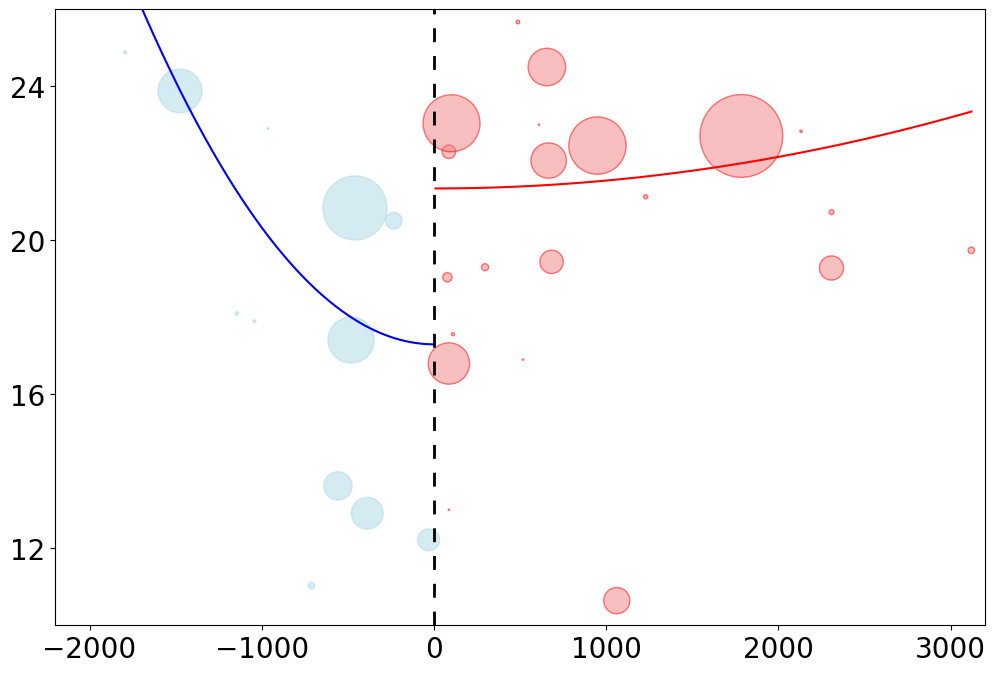

In [129]:
plt.figure(figsize=(12, 8))
# Split the data into two parts
df_below = df_rd_HDD[df_rd_HDD['HDD_run'] < 0]
df_above = df_rd_HDD[df_rd_HDD['HDD_run'] >= 0]
# Scatter plot for points below the threshold
plt.scatter(df_below['HDD_run'], df_below['top'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['HDD_run'], df_above['top'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of HDD_run values
HDD_run_grid = np.linspace(df_rd_HDD['HDD_run'].min(), df_rd_HDD['HDD_run'].max(), 500)

# Compute threshold values for each point
threshold_grid = (HDD_run_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'HDD_run': HDD_run_grid, 'HDD_run2': HDD_run_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model_HDD.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['HDD_run'] < 0]
grid_above = grid_df[grid_df['HDD_run'] >= 0]
pred_below = predictions[grid_df['HDD_run'] < 0]
pred_above = predictions[grid_df['HDD_run'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['HDD_run'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['HDD_run'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# # plot city names on the graph
# for i in range(len(df_rd_HDD)):
#     plt.text(df_rd_HDD['HDD_run'][i], df_rd_HDD['top'][i], get_city_name(df_rd_HDD['city'][i]), fontsize=12)
#     plt.text(df_rd_HDD['HDD_run'][i], df_rd_HDD['top'][i]-0.5, df_rd_HDD['p_dh'][i], fontsize=12)

# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.xlim(-2200, 3200)

plt.yticks(np.arange(12, 28, 4), fontsize=20)
plt.ylim(10, 26)

# Save as SVG
plt.savefig('fig6a.svg', format='svg')
plt.show()

In [113]:
# Quadratic model_HDD
df_rd_HDD['HDD_run2'] = df_rd_HDD['HDD_run'] ** 2
# try polynomial
model_HDD = smf.wls("thermal_sensation ~ HDD_run2*threshold", df_rd_HDD, weights=df_rd_HDD["records"]).fit()
print("Baseline is:", model_HDD.summary().tables[1][1][1])
print("Effect is:", model_HDD.summary().tables[1][3][1])
print("pvalue is:", model_HDD.summary().tables[1][3][4])
model_HDD.summary().tables[1]

Baseline is:    -0.4528
Effect is:     0.6211
pvalue is:  0.004


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.4528,0.150,-3.014,0.005,-0.760,-0.146
HDD_run2,2.007e-07,1.59e-07,1.261,0.217,-1.25e-07,5.26e-07
threshold,0.6211,0.196,3.172,0.004,0.221,1.021
HDD_run2:threshold,-1.875e-07,1.69e-07,-1.107,0.277,-5.34e-07,1.59e-07


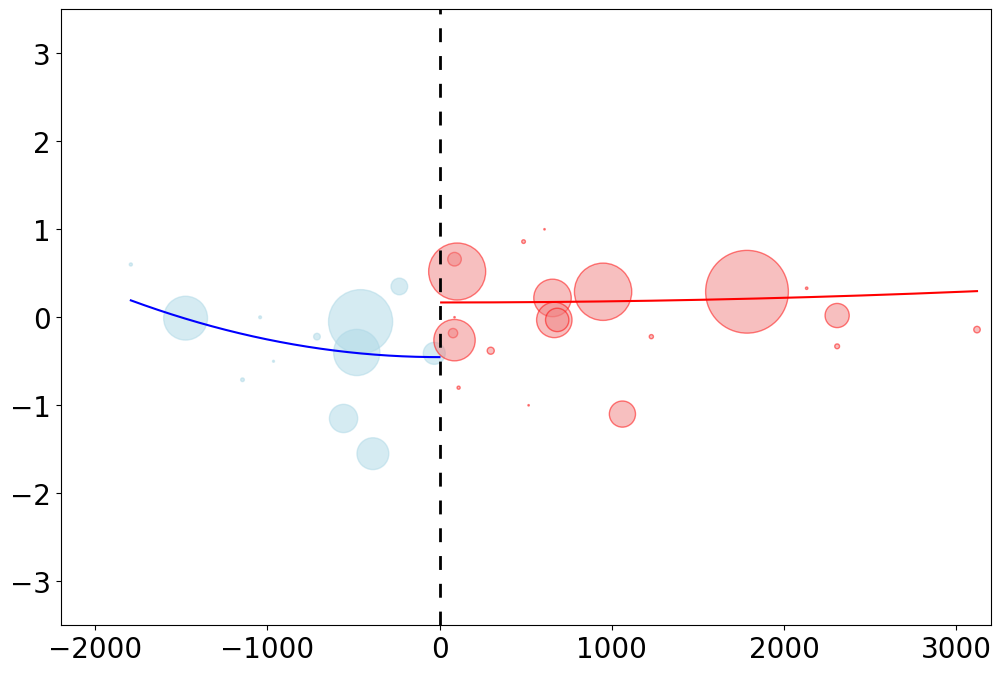

In [122]:
plt.figure(figsize=(12, 8))
# Split the data into two parts
df_below = df_rd_HDD[df_rd_HDD['HDD_run'] < 0]
df_above = df_rd_HDD[df_rd_HDD['HDD_run'] >= 0]
# Scatter plot for points below the threshold
plt.scatter(df_below['HDD_run'], df_below['thermal_sensation'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['HDD_run'], df_above['thermal_sensation'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of HDD_run values
HDD_run_grid = np.linspace(df_rd_HDD['HDD_run'].min(), df_rd_HDD['HDD_run'].max(), 500)

# Compute threshold values for each point
threshold_grid = (HDD_run_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'HDD_run': HDD_run_grid, 'HDD_run2': HDD_run_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model_HDD.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['HDD_run'] < 0]
grid_above = grid_df[grid_df['HDD_run'] >= 0]
pred_below = predictions[grid_df['HDD_run'] < 0]
pred_above = predictions[grid_df['HDD_run'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['HDD_run'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['HDD_run'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# # plot city names on the graph
# for i in range(len(df_rd_HDD)):
#     plt.text(df_rd_HDD['HDD_run'][i], df_rd_HDD['thermal_sensation'][i], get_city_name(df_rd_HDD['city'][i]), fontsize=12)
#     plt.text(df_rd_HDD['HDD_run'][i], df_rd_HDD['thermal_sensation'][i]-0.5, df_rd_HDD['p_dh'][i], fontsize=12)


# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-2200, 3200)
plt.ylim(-3.5, 3.5)


# Save as SVG
plt.savefig('fig6b.svg', format='svg')
plt.show()